In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Sample


In [3]:
df=pd.read_csv('sample_ramdon1.xlsx.csv')
df.head()

,x,y,n
0,6705,1177,28
1,2944,8916,26
2,8607,8959,29
3,9902,2339,18
4,8502,7278,32


In [4]:
for index, row in df.iterrows():
    curx = row['x']
    cury = row['y']    
    if index==0: 
        X = np.array([curx,cury], dtype='int64')
    else:
        oldX = X
        newX = np.array([curx,cury], dtype='int64')
        X=np.vstack((X,newX))

In [5]:
nobs = X.shape[0]

# Sample Viz

We can visualize the resulting data:



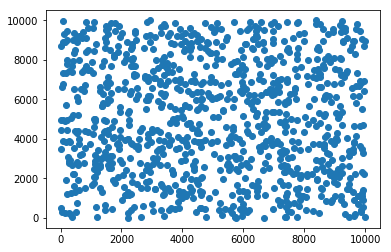

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Distance matrix

In [7]:
# Distance matrix
from scipy.spatial import distance_matrix

In [8]:
dist_mat = distance_matrix(X, X, p=2)

In [9]:
dist_mat

array([[     0.        ,   8604.48964204,   8011.06285083, ...,
          3282.28121891,   8765.99595026,   8535.2971243 ],
       [  8604.48964204,      0.        ,   5663.16325034, ...,
         10893.38588319,   2928.32187438,   4272.73039168],
       [  8011.06285083,   5663.16325034,      0.        , ...,
          8506.2006795 ,   3044.55727488,   1640.4063521 ],
       ..., 
       [  3282.28121891,  10893.38588319,   8506.2006795 , ...,
             0.        ,  10240.39750205,   9559.37660101],
       [  8765.99595026,   2928.32187438,   3044.55727488, ...,
         10240.39750205,      0.        ,   1448.85955151],
       [  8535.2971243 ,   4272.73039168,   1640.4063521 , ...,
          9559.37660101,   1448.85955151,      0.        ]])

In [10]:
# df_describe = pd.DataFrame(dist_mat)
df_describe = pd.DataFrame(dist_mat.flatten())
df_describe.describe()

,0
count,1000000.000000
mean,5215.531967
std,2489.633771
min,0.000000
25%,3279.046355
50%,5129.028466
75%,7039.382359
max,14025.464449


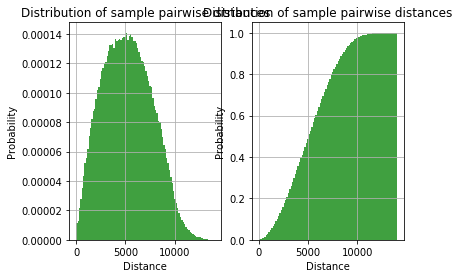

In [26]:
plt.subplot(1,2,1)
n, bins, patches = plt.hist(dist_mat.flatten(), 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Distribution of sample pairwise distances')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(dist_mat.flatten(), bins=bins, density=True, facecolor='g', alpha=0.75, cumulative=True)
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Distribution of sample pairwise distances')
plt.grid(True)
plt.show()

# Neighbors at $\epsilon$ 

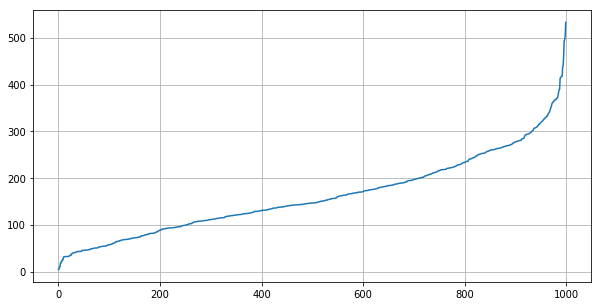

In [73]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(X)
distances, idx = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(True)
plt.show()

In [69]:
print('pctile','\t','eps','\t\t','count','\t\t','mean','\t','std','\t\t','min','\t','25%','\t','50%','\t','75%','\t','max')
for i in range(1, 20, 1):   
    cureps = np.percentile(dist_mat.flatten(), i, axis=0)
    curN = np.count_nonzero(dist_mat <= cureps, axis=0)
    df_describe = pd.DataFrame(curN).describe().transpose()
    print(i, '\t', cureps, '\t', df_describe['count'].values[0], '\t', 
          df_describe['mean'].values[0],'\t',  df_describe['std'].values[0],'\t',  
          df_describe['min'].values[0], '\t', df_describe['25%'].values[0], '\t', df_describe['50%'].values[0], '\t', 
          df_describe['75%'].values[0], '\t', df_describe['max'].values[0])


pctile 	 eps 		 count 		 mean 	 std 		 min 	 25% 	 50% 	 75% 	 max
1 	 549.217452378 	 1000.0 	 10.0 	 3.16986561987 	 2.0 	 8.0 	 10.0 	 12.0 	 20.0
2 	 811.940022283 	 1000.0 	 20.0 	 5.10764995747 	 5.0 	 17.0 	 20.0 	 23.0 	 33.0
3 	 1007.21648607 	 1000.0 	 30.0 	 7.04369317997 	 9.0 	 25.0 	 31.0 	 35.0 	 49.0
4 	 1181.82098466 	 1000.0 	 40.0 	 9.12607721232 	 12.0 	 34.0 	 41.0 	 46.0 	 68.0
5 	 1333.47787758 	 1000.0 	 50.0 	 11.465839065 	 14.0 	 43.0 	 52.0 	 58.0 	 77.0
6 	 1470.26526857 	 1000.0 	 60.0 	 13.7231309957 	 17.0 	 52.0 	 63.0 	 70.0 	 88.0
7 	 1595.93957278 	 1000.0 	 70.0 	 16.2371686462 	 18.0 	 59.0 	 75.0 	 82.0 	 101.0
8 	 1716.79439651 	 1000.0 	 80.0 	 18.728287395 	 21.0 	 67.0 	 86.0 	 94.0 	 114.0
9 	 1830.4265101 	 1000.0 	 90.0 	 21.4367332757 	 23.0 	 75.0 	 97.0 	 106.0 	 128.0
10 	 1941.71728117 	 1000.0 	 100.002 	 24.0556993802 	 25.0 	 83.0 	 108.0 	 118.0 	 141.0
11 	 2048.52912598 	 1000.0 	 110.0 	 26.7134724364 	 27.0 	 90.75 	 118.0 	 13

In [62]:
df_describe['min'].values[0]

62.0

In [81]:
# neighbors
# myeps = 1000
myeps = 900
N = np.count_nonzero(dist_mat <= myeps, axis=0)

In [82]:
df_describe = pd.DataFrame(N)
print(df_describe.describe())

                 0
count  1000.000000
mean     24.376000
std       5.944069
min       7.000000
25%      20.000000
50%      25.000000
75%      29.000000
max      39.000000


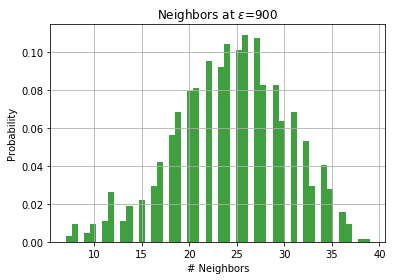

In [83]:
n, bins, patches = plt.hist(N, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('# Neighbors')
plt.ylabel('Probability')
plt.title('Neighbors at '+r'$\epsilon$='+str(myeps))
plt.grid(True)
plt.show()

In [84]:
# loop within percentiles
for i in range(1, 100, 1):   
    minpts = np.percentile(N, i, axis=0)    
    db = DBSCAN(eps=myeps, min_samples=minpts).fit(X)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    noise_share = (n_noise/nobs)*100
    cluster_share = 100-noise_share
    conc_coeff = (cluster_share/(100-i))-1
    try: 
        silhout=metrics.silhouette_score(X, labels)
    except:
        silhout=None        
    if i==1:
        curdata = {'pctile':[i],'neighbors':[minpts],'cluster_share':[cluster_share],'conc_coeff':[conc_coeff],
            'silhout':[silhout],'n_clusters':[n_clusters],'n_noise':[n_noise], 'noise_share':[noise_share]}
        df_pctiles = pd.DataFrame(curdata)
    else:
        curdata = {'pctile':i,'neighbors':minpts,'cluster_share':cluster_share,'conc_coeff':conc_coeff,
            'silhout':silhout,'n_clusters':n_clusters,'n_noise':n_noise, 'noise_share':noise_share}
        df_pctiles=df_pctiles.append(curdata, ignore_index=True)
df_pctiles.head()

,cluster_share,conc_coeff,n_clusters,n_noise,neighbors,noise_share,pctile,silhout
0,100.0,0.010101,1.0,0.0,9.0,0.0,1.0,NaN
1,100.0,0.020408,1.0,0.0,11.0,0.0,2.0,NaN
2,100.0,0.030928,1.0,0.0,12.0,0.0,3.0,NaN
3,100.0,0.041667,1.0,0.0,12.0,0.0,4.0,NaN
4,99.9,0.051579,1.0,1.0,14.0,0.1,5.0,0.165762


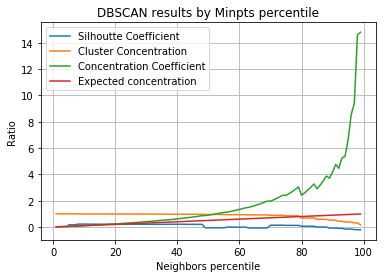

In [85]:
# plot lines
plt.plot(df_pctiles['pctile'], df_pctiles['silhout'], label = "Silhoutte Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['cluster_share']/100, label = "Cluster Concentration")
plt.plot(df_pctiles['pctile'], df_pctiles['conc_coeff'], label = "Concentration Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['pctile']/100, label = "Expected concentration")
plt.legend()
plt.xlabel('Neighbors percentile')
plt.ylabel('Ratio')
plt.title('DBSCAN results by Minpts percentile')
plt.grid(True)
plt.show()

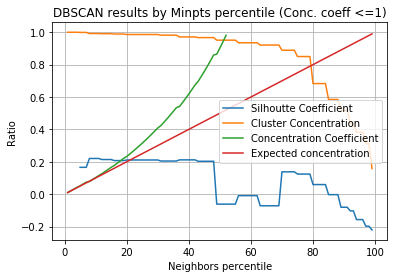

In [86]:
# plot lines
plt.plot(df_pctiles['pctile'], df_pctiles['silhout'], label = "Silhoutte Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['cluster_share']/100, label = "Cluster Concentration")
plt.plot(df_pctiles[df_pctiles['conc_coeff']<=1]['pctile'], df_pctiles[df_pctiles['conc_coeff']<=1]['conc_coeff'], label = "Concentration Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['pctile']/100, label = "Expected concentration")
plt.legend()
plt.xlabel('Neighbors percentile')
plt.ylabel('Ratio')
plt.title('DBSCAN results by Minpts percentile (Conc. coeff <=1)')
plt.grid(True)
plt.show()

In [87]:
pd.set_option('display.max_rows', 100)
df_pctiles

,cluster_share,conc_coeff,n_clusters,n_noise,neighbors,noise_share,pctile,silhout
0,100.0,0.010101,1.0,0.0,9.00,0.0,1.0,NaN
1,100.0,0.020408,1.0,0.0,11.00,0.0,2.0,NaN
2,100.0,0.030928,1.0,0.0,12.00,0.0,3.0,NaN
3,100.0,0.041667,1.0,0.0,12.00,0.0,4.0,NaN
4,99.9,0.051579,1.0,1.0,14.00,0.1,5.0,0.165762
5,99.9,0.062766,1.0,1.0,14.94,0.1,6.0,0.165762
6,99.9,0.074194,1.0,1.0,15.00,0.1,7.0,0.165762
7,99.2,0.078261,1.0,8.0,16.00,0.8,8.0,0.220395
8,99.2,0.090110,1.0,8.0,16.00,0.8,9.0,0.220395
9,99.2,0.102222,1.0,8.0,17.00,0.8,10.0,0.220395


## Compute DBSCAN

One can access the labels assigned by :class:`~sklearn.cluster.DBSCAN` using
the `labels_` attribute. Noisy samples are given the label math:`-1`.



In [88]:
minpts = np.percentile(N, 98, axis=0)    
db = DBSCAN(eps=myeps, min_samples=minpts).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
conc_share_ = 1-n_noise_/nobs 

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"Concentration share:  %.3f percent" % conc_share_)

Estimated number of clusters: 6
Estimated number of noise points: 688
Silhouette Coefficient: -0.198
Concentration share:  0.312 percent


## Plot results

Core samples (large dots) and non-core samples (small dots) are color-coded
according to the asigned cluster. Samples tagged as noise are represented in
black.



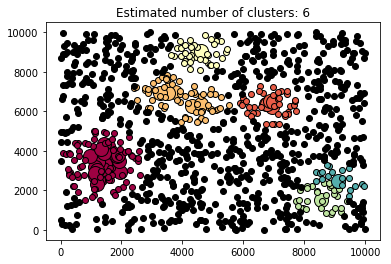

In [89]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()